In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import glob 

(9, 5)


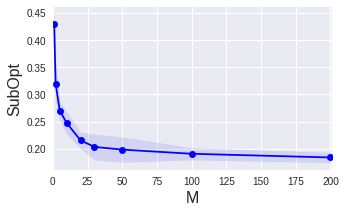

In [26]:
M_list = [1,2,5,10,20,30,50,100,200]
n_trials = 5
data_all = [] #(M, trial)
for M in M_list: 
    res_path = '/scratch/tnguy258/neuralofflinerl-2/test-M-results/M={}/mu_eps=0.5/quadratic/NeuralPER'.format(M) 
    data_per_M = []
    for trial in range(n_trials):
        data = np.load(os.path.join(res_path, 'trial={}.npz'.format(trial)))['arr_0'][-1,1]
        data_per_M.append(data) 
    data_all.append(data_per_M)

# data_all = np.log( np.array(data_all) )
data_all = np.array(data_all) 
print(data_all.shape) 
# print(data_all)

mu = np.mean(data_all, axis=1)
std = np.std(data_all, axis=1) / np.sqrt(n_trials) 

fig = plt.figure(figsize=(5,3))
plt.style.use('seaborn')
plt.plot(M_list, mu, marker='o', color='b')
plt.fill_between(M_list, mu + 1.96 * std, mu - 1.96 * std, alpha=0.1, color='b')

plt.xlim([0, M_list[-1] + 1])
plt.xlabel('M', fontsize=16) 
plt.ylabel('SubOpt', fontsize=16)

fig.savefig('subopt_vs_M.png', bbox_inches='tight', dpi=400)